In [1]:
# pip install opencv-python
import cv2 as cv
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import glob
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ten

In [2]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 

In [3]:
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

In [4]:
#讀取train圖片 # 'C:\\Users\\User\\Desktop\\深度學習簡介\\kldata\\kldata'
p_img_train = os.getcwd() + '\\train\\'
image_ls_train = list()
for i in range(5):
    image_sin_train = [cv.imread(file) for file in glob.glob(p_img_train + str(i) + '\\' + '*' + '.png')]
    image_ls_train.append(image_sin_train)


#讀取test圖片
p_img_test = os.getcwd() + '\\test\\'
image_ls_test = list()
for i in range(5):
    image_sin_test = [cv.imread(file) for file in glob.glob(p_img_test + str(i) + '\\' + '*' + '.png')]
    image_ls_test.append(image_sin_test)
    

#cv.imshow('input', image_ls_train[0])
#cv.waitKey(0)
#cv.destroyWindow

In [8]:
#讀取五種骨刺等級X光片
images_train = list()
for i in range(5):
    for j in range(len(image_ls_train[i])):
        images_train.append(image_ls_train[i][j])

In [9]:
#讀取五種骨刺等級X光片
images_test = list()
for i in range(5):
    for j in range(len(image_ls_test[i])):
        images_test.append(image_ls_test[i][j])

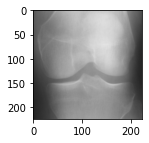

In [10]:
show_image(images_train[0])

In [11]:
# 裁切區域的 x 與 y 座標（左上角）
x = 0
y = 80

# 裁切區域的長度與寬度
w = 200
h = 100

#切割所有圖片
crop_img_train = list()
crop_img_test = list()

for i in range(len(images_train)):
    crop_img_train.append(images_train[i][y:y+h, x:x+w])
    
for i in range(len(images_test)):
    crop_img_test.append(images_test[i][y:y+h, x:x+w])

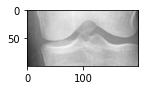

In [12]:
show_image(crop_img_test[0]) 

In [13]:
#圖片歸一化/標準化
image_uni_train = (crop_img_train - np.min(crop_img_train)) / (np.max(crop_img_train) - np.min(crop_img_train))
image_uni_test = (crop_img_test - np.min(crop_img_test)) / (np.max(crop_img_test) - np.min(crop_img_test))

In [14]:
image_uni_train.shape

(5778, 100, 200, 3)

In [15]:
print(image_uni_train)

[[[[0.30196078 0.30196078 0.30196078]
   [0.30588235 0.30588235 0.30588235]
   [0.31372549 0.31372549 0.31372549]
   ...
   [0.46666667 0.46666667 0.46666667]
   [0.44313725 0.44313725 0.44313725]
   [0.43529412 0.43529412 0.43529412]]

  [[0.30588235 0.30588235 0.30588235]
   [0.30980392 0.30980392 0.30980392]
   [0.30980392 0.30980392 0.30980392]
   ...
   [0.4627451  0.4627451  0.4627451 ]
   [0.44705882 0.44705882 0.44705882]
   [0.43529412 0.43529412 0.43529412]]

  [[0.30196078 0.30196078 0.30196078]
   [0.30588235 0.30588235 0.30588235]
   [0.30980392 0.30980392 0.30980392]
   ...
   [0.45490196 0.45490196 0.45490196]
   [0.44313725 0.44313725 0.44313725]
   [0.42352941 0.42352941 0.42352941]]

  ...

  [[0.15294118 0.15294118 0.15294118]
   [0.15686275 0.15686275 0.15686275]
   [0.16078431 0.16078431 0.16078431]
   ...
   [0.36470588 0.36470588 0.36470588]
   [0.34509804 0.34509804 0.34509804]
   [0.3372549  0.3372549  0.3372549 ]]

  [[0.14901961 0.14901961 0.14901961]
   [0.1

In [16]:
#轉成向量
image_vector_train = image_uni_train.reshape(len(image_uni_train), 100,200,3).astype('float32')
image_vector_test = image_uni_test.reshape(len(image_uni_test), 100,200,3).astype('float32')

In [17]:
import numpy as np
train_label = np.loadtxt("all_train_label.csv",dtype=np.int,delimiter=',')
test_label = np.loadtxt("all_test_label.csv",dtype=np.int,delimiter=',')

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note li

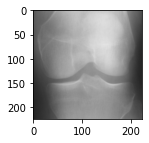

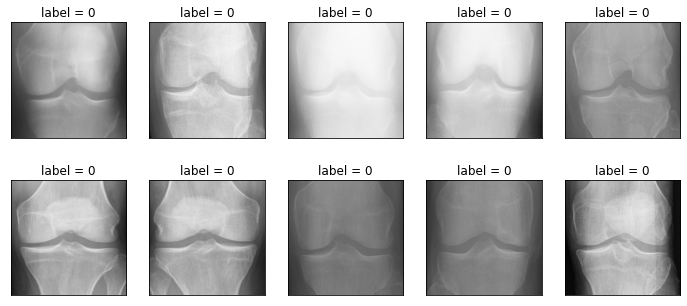

In [18]:
show_image(images_train[0]) 
show_images_labels_predictions(images_train,train_label,[],0,10)    

In [19]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [20]:
print(train_label_onehot)
len(train_label_onehot)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


5778

In [ ]:
#建立模型
model = Sequential()
#建立卷積層1
model.add(Conv2D(filters=10, 
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(100,200,3), 
                 activation='relu'))

#建立池化層1
model.add(MaxPooling2D(pool_size=(2, 2))) 

#建立卷積層2 padding為得到圖的大小
model.add(Conv2D(filters=20, 
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))

#建立池化層2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout層防止過度擬合，斷開比例:0.2
model.add(Dropout(0.2))

#建立平坦層
model.add(Flatten()) 

#建立隱藏層
model.add(Dense(units=256, activation='relu'))

#建立輸出層
model.add(Dense(units=5,activation='softmax'))

#定義訓練方式
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=image_vector_train,
                         y=train_label_onehot, 
                         epochs=50, batch_size=200,verbose=2)



Epoch 1/50
 - 53s - loss: 1.7783 - accuracy: 0.3236
Epoch 2/50
 - 51s - loss: 1.4089 - accuracy: 0.3960
Epoch 3/50
 - 51s - loss: 1.3940 - accuracy: 0.3948
Epoch 4/50
 - 51s - loss: 1.3872 - accuracy: 0.4007
Epoch 5/50


In [71]:
#評估準確率
scores = model.evaluate(image_vector_test, test_label_onehot)
print('\n準確率=',scores[1])

52/52 [==============================] - 2s 40ms/step - loss: 1.2508 - accuracy: 0.4710

準確率= 0.47101449966430664


In [67]:
#預測
prediction=model.predict_classes(image_vector_test)

/Users/charlie/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


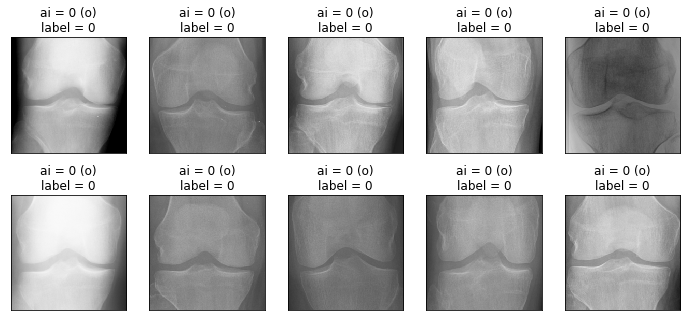

In [68]:
#顯示圖像、預測值、真實值 
show_images_labels_predictions(images_test,test_label,prediction,0)

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package              Version
-------------------- -------------------
absl-py              0.11.0
argon2-cffi          20.1.0
astor                0.8.1
async-generator      1.10
attrs                20.3.0
backcall             0.2.0
bleach               3.3.0
cached-property      1.5.1
certifi              2020.12.5
cffi                 1.14.5
colorama             0.4.4
cycler               0.10.0
decorator            4.4.2
defusedxml           0.6.0
entrypoints          0.3
gast                 0.4.0
google-pasta         0.2.0
grpcio               1.35.0
h5py                 3.1.0
importlib-metadata   3.4.0
ipykernel            5.3.4
ipython              7.20.0
ipython-genutils     0.2.0
ipywidgets           7.6.3
jedi                 0.17.0
Jinja2               2.11.3
jsonschema           3.0.2
jupyter              1.0.0
jupyter-client       6.1.7
jupyter-console      6.2.0
jupyter-core         4.7.1
jupyterlab-pygments  0.1.2
jupyterlab-widgets   1.0.0
Keras                2.3.1
Ke

In [12]:
os.getcwd()

'C:\\Users\\User\\Desktop\\深度學習簡介\\kldata\\kldata'

In [5]:
image_ls_train

[[array([[[89, 89, 89],
          [91, 91, 91],
          [93, 93, 93],
          ...,
          [85, 85, 85],
          [81, 81, 81],
          [76, 76, 76]],
  
         [[89, 89, 89],
          [91, 91, 91],
          [91, 91, 91],
          ...,
          [84, 84, 84],
          [79, 79, 79],
          [74, 74, 74]],
  
         [[90, 90, 90],
          [90, 90, 90],
          [92, 92, 92],
          ...,
          [83, 83, 83],
          [79, 79, 79],
          [76, 76, 76]],
  
         ...,
  
         [[36, 36, 36],
          [36, 36, 36],
          [38, 38, 38],
          ...,
          [78, 78, 78],
          [79, 79, 79],
          [79, 79, 79]],
  
         [[36, 36, 36],
          [35, 35, 35],
          [38, 38, 38],
          ...,
          [81, 81, 81],
          [80, 80, 80],
          [80, 80, 80]],
  
         [[36, 36, 36],
          [36, 36, 36],
          [37, 37, 37],
          ...,
          [82, 82, 82],
          [82, 82, 82],
          [80, 80, 80]]], dtype=u